# Experimental Tests

In [1]:
import torch
torch.set_grad_enabled(False)
import math

from dataset import generate_dataset_disk
from module import *
from training import train, test

from plotter import *
from mlxtend.plotting import plot_decision_regions

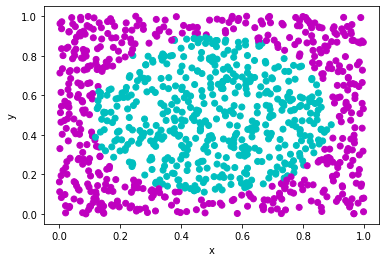

In [2]:
# Load the dataset
train_input, train_label = generate_dataset_disk()
test_input, test_label = generate_dataset_disk(plot=False)

Epoch 10/300, Train_Loss: 0.5938, Val_Loss: 0.6631
Epoch 20/300, Train_Loss: 0.5711, Val_Loss: 0.6398
Epoch 30/300, Train_Loss: 0.5489, Val_Loss: 0.6177
Epoch 40/300, Train_Loss: 0.5309, Val_Loss: 0.5983
Epoch 50/300, Train_Loss: 0.5168, Val_Loss: 0.5821
Epoch 60/300, Train_Loss: 0.5052, Val_Loss: 0.5685
Epoch 70/300, Train_Loss: 0.4951, Val_Loss: 0.5552
Epoch 80/300, Train_Loss: 0.4837, Val_Loss: 0.5396
Epoch 90/300, Train_Loss: 0.4703, Val_Loss: 0.5258
Epoch 100/300, Train_Loss: 0.4581, Val_Loss: 0.5126
Epoch 110/300, Train_Loss: 0.4471, Val_Loss: 0.5010
Epoch 120/300, Train_Loss: 0.4379, Val_Loss: 0.4906
Epoch 130/300, Train_Loss: 0.4306, Val_Loss: 0.4820
Epoch 140/300, Train_Loss: 0.4247, Val_Loss: 0.4746
Epoch 150/300, Train_Loss: 0.4198, Val_Loss: 0.4684
Epoch 160/300, Train_Loss: 0.4156, Val_Loss: 0.4632
Epoch 170/300, Train_Loss: 0.4119, Val_Loss: 0.4592
Epoch 180/300, Train_Loss: 0.4088, Val_Loss: 0.4555
Epoch 190/300, Train_Loss: 0.4060, Val_Loss: 0.4524
Epoch 200/300, Train_

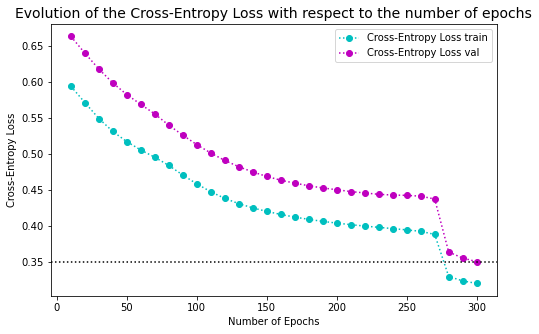

In [3]:
# model
model = Sequential(Linear(2, 25), ReLU(),
                   Linear(25,25), ReLU(),
                   Linear(25,25), ReLU(),
                   Linear(25,2), Sigmoid())

# loss function
loss_function = Loss(model, fun='CrossEntropy')

# training parameters
batch_size = 25
nb_epochs = 300
lr = 1e-3

# train 
train(model, loss_function, train_input, train_label, nb_epochs, lr, batch_size=batch_size, show_plot=True)

In [4]:
# test
train_error = test(model, train_input, train_label)
test_error = test(model, test_input, test_label)

print('Train Error: {}%'.format(train_error))
print('Test Error: {}%'.format(test_error))

Train Error: 1.0999999999999999%
Test Error: 1.7999999999999998%


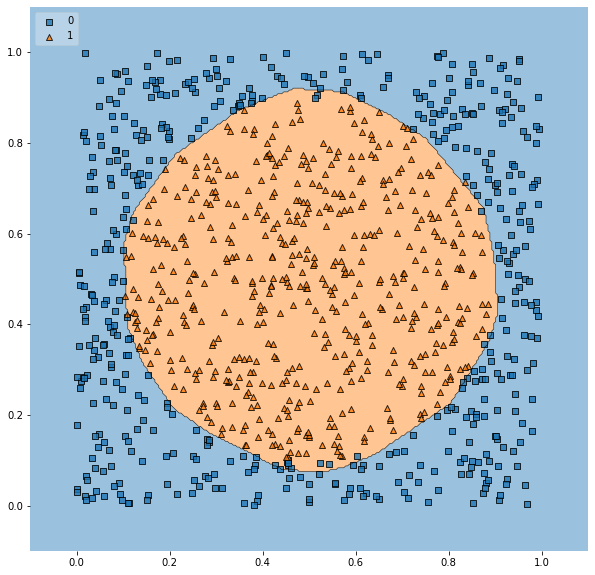

In [5]:
class ModelNoHoneHot():
    def __init__(self, model):
        self.model = model

    def predict(self, x):
        x = torch.tensor(x)
        preds = self.model(x)
        return torch.argmax(preds, dim=1).numpy()
model_no_one_hot = ModelNoHoneHot(model)

# decision regions
plt.figure(figsize=(10, 10))
plot_decision_regions(test_input.numpy(), torch.argmax(test_label, dim=1).numpy(), clf=model_no_one_hot, legend=2)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.savefig('plots/decision regions')
plt.show()